In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pickle

__author__ = "Sid Vanam"
__email__ = "vanamsid@gmail.com"

## Create Models using pickled TRAINS & TESTS

In [2]:
with open('../salary prediction data/TRAIN_X.pkl', 'rb') as temp0:
    X_train = pickle.load(temp0)
with open('../salary prediction data/TEST_X.pkl', 'rb') as temp1:
    X_test = pickle.load(temp1)
with open('../salary prediction data/TRAIN_Y.pkl', 'rb') as temp2:
    y_train = pickle.load(temp2)
with open('../salary prediction data/TEST_Y.pkl', 'rb') as temp3:
    y_test = pickle.load(temp3)

# Use sklearn to create models

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error

In [4]:
def score_model(model):
    ''' Returns a Mean Squared Error Score based on the model'''
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return mean_squared_error(predictions, y_test)

## 4 Types of models to implement: Save base models as pickle files
- LinearRegression
- RandomForestRegressor
- Gradient Boosting Regressor
- XGBoost

In [5]:
lr = LinearRegression(n_jobs = -1)

In [6]:
rf = RandomForestRegressor(n_estimators= 50, n_jobs = -1, random_state= 42,
                           max_depth= 20, min_samples_split= 50)

In [7]:
gbr = GradientBoostingRegressor(n_estimators= 50, random_state= 42,
                           max_depth= 20, min_samples_split= 20)


In [8]:
xgbr = XGBRegressor(random_state= 42, n_jobs= -1) #insert 2nd model below this cell

### Linear Regression

In [9]:
lr_score = score_model(lr)
lr_score

383.2826458726202

In [10]:
with open('../salary prediction data/Base Models/base_lr.pkl', 'wb') as temp0:
    pickle.dump(lr, temp0)

### Random Forest Regressor model

In [11]:
rf_score = score_model(rf)
rf_score

368.65560615797506

In [13]:
with open('../salary prediction data/Base Models/base_rf.pkl', 'wb') as temp1:
    pickle.dump(rf, temp1)

### Gradient Boosting model

In [14]:
gbr_score = score_model(gbr)
gbr_score

411.2045840818035

In [15]:
with open('../salary prediction data/Base Models/base_gbr.pkl', 'wb') as temp2:
    pickle.dump(gbr, temp2)

### XGBoost model

In [16]:
xgbr_score = score_model(xgbr)
xgbr_score

[20:11:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


393.09930220219684

In [17]:
with open('../salary prediction data/Base Models/base_xgbr.pkl', 'wb') as temp3:
    pickle.dump(xgbr, temp3)

### Create model dataframe w/ lists of names and scores --> Dict --> DF

In [18]:
model_names = ['LinearRegression', 'RandomForestRegressor', 'GradientBoostingRegressor', 'XGBRegressor']
model_scores = [lr_score, rf_score, gbr_score, xgbr_score]
model_dict = dict(zip(model_names, model_scores))

In [20]:
initial_scores = pd.Series(model_dict).sort_values(ascending= False)
initial_scores

GradientBoostingRegressor    411.204584
XGBRegressor                 393.099302
LinearRegression             383.282646
RandomForestRegressor        368.655606
dtype: float64

**Summary:** Random Forest is the best estimator as it produces the lowest MSE, followed by the simple Linear Regression model - **boosting Regressors performed considerably worse**.

# Hyper Parameter Tuning

In [21]:
N_Estimator = [2, 4, 6, 8, 10, 20, 50,100]                       #20 ideal value at the elbow - works for time v acc tradeoff
MinSampleSplit = [10,20,30,40,50,60,70, 80,90,100,150,200]       #60 " "
MaxDepths = [2,4, 6, 8, 10,15,20, 30, 40, 50, 60, 70, 80, 90]    #15-20
MaxFeatures = ['auto', 'sqrt', 'log2']                           #Auto produces the lowest


## HyperParameter Tuning for Random Forest Model

In [22]:
train_rf_estimators = []

In [23]:
for estimator in N_Estimator:
    rf_model = RandomForestRegressor(n_estimators= estimator, n_jobs = -1, random_state= 42,
                           max_depth= 20, min_samples_split= 50)

    train_rf_estimators.append(score_model(rf_model))

In [25]:
rf_estimator_dict = dict(zip(N_Estimator, train_rf_estimators))
rfes = pd.Series(rf_estimator_dict)
rfes

2      389.206309
4      378.447903
6      374.778904
8      373.159847
10     372.051954
20     369.936596
50     368.655606
100    368.349581
dtype: float64

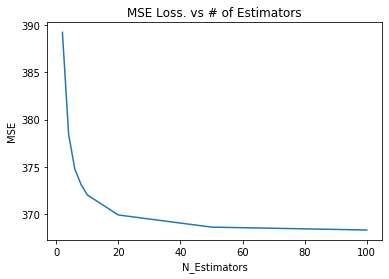

In [36]:
plt.plot(N_Estimator, train_rf_estimators, label = 'training set score')
plt.xlabel('N_Estimators')
plt.ylabel('MSE')
plt.title('MSE Loss. vs # of Estimators')
plt.show()

In [31]:
plt.savefig('tune_rf_estimators.png', dpi = 300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [33]:
min_sample_estimators = []

In [34]:
for min_sample in MinSampleSplit:
    rf_model = RandomForestRegressor(n_estimators= 30, n_jobs = -1, random_state= 42,
                           max_depth= 20, min_samples_split= min_sample)
    
    min_sample_estimators.append(score_model(rf_model))

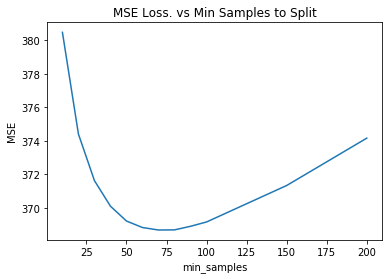

In [35]:
plt.plot(MinSampleSplit, min_sample_estimators, label = 'training set score')
plt.xlabel('min_samples')
plt.ylabel('MSE')
plt.title('MSE Loss. vs Min Samples to Split')
plt.show()

In [ ]:
plt.savefig('tune_rf_minsamples.png', dpi = 300, bbox_inches='tight')

In [37]:
depth_estimators = []

In [38]:
for depth in MaxDepths:
    rf_model = RandomForestRegressor(n_estimators= 30, n_jobs = -1, random_state= 42,
                           max_depth= depth, min_samples_split= 50)
    
    depth_estimators.append(score_model(rf_model))

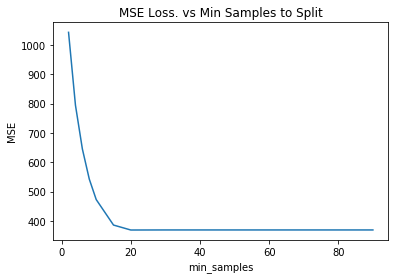

In [39]:
plt.plot(MaxDepths, depth_estimators, label = 'training set score')
plt.xlabel('min_samples')
plt.ylabel('MSE')
plt.title('MSE Loss. vs Min Samples to Split')
plt.show()

In [40]:
max_feat_estimators = []

In [41]:
for maxf in MaxFeatures:
    rf_model = RandomForestRegressor(n_estimators= 30, n_jobs = -1, random_state= 42,
                           max_depth= 20, min_samples_split= 50, max_features= maxf)
    
    max_feat_estimators.append(score_model(rf_model))

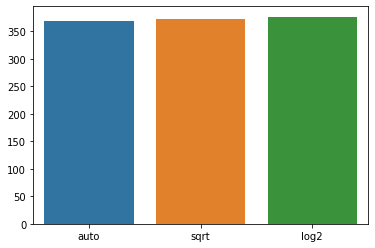

In [42]:
sns.barplot(MaxFeatures, max_feat_estimators)

In [43]:
max_feat_estimators

[369.2230997602034, 373.17229167450165, 376.6331250606815]

In [44]:
rf_hps = {'n_estimators': 20,
          'max_depth': 18,
          'min_samples_split': 60,
          'random_state': 42,
          'warm_start': True}

In [45]:
best_rf = RandomForestRegressor(rf_hps)

## HyperParameter Tuning for Gradient Boosting Model

In [46]:
n_estimator = [2, 4, 6, 8, 10, 20, 50,100]                       #20 ideal value at the elbow - works for time v acc tradeoff
MinSampleSplit = [10,20,30,40,50,60,70, 80,90,100,150,200]       #60 " "
MaxDepths = [2,4, 6, 8, 10,15,20, 30, 40, 50, 60, 70, 80, 90]    #15-20

In [49]:
best_gbr_depth = []

In [50]:
for depth in MaxDepths:
    gbr_model = GradientBoostingRegressor(warm_start = True, random_state = 42,
              min_samples_split = 20, n_estimators = 50, max_depth=depth)
    
    best_gbr_depth.append(score_model(gbr_model))

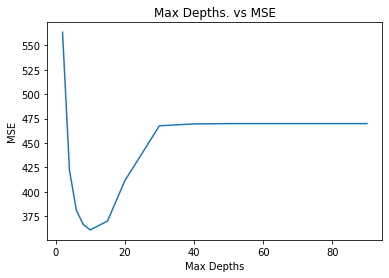

In [58]:
plt.plot(MaxDepths, best_gbr_depth, label = 'training set score')
plt.xlabel('Max Depths')
plt.ylabel('MSE')
plt.title('Max Depths. vs MSE')
plt.show()

In [52]:
best_gbr_estimators = []

In [53]:
for estimator in N_Estimator:
    gbr_model = GradientBoostingRegressor(warm_start = True, random_state = 42,
              min_samples_split = 20, n_estimators = estimator, max_depth=10)
    
    best_gbr_estimators.append(score_model(gbr_model))

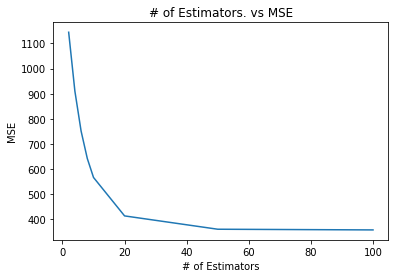

In [54]:
plt.plot(N_Estimator, best_gbr_estimators, label = 'training set score')
plt.xlabel('# of Estimators')
plt.ylabel('MSE')
plt.title('# of Estimators. vs MSE')
plt.show()

In [55]:
best_minsamp_gbr = []

In [56]:
for min_sample in MinSampleSplit: #minsamples
    gbr_model = GradientBoostingRegressor(warm_start = True, random_state = 42,
              min_samples_split = min_sample, n_estimators = 10, max_depth=10)
    
    best_minsamp_gbr.append(score_model(gbr_model))

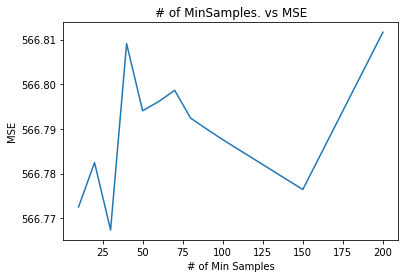

In [57]:
plt.plot(MinSampleSplit, best_minsamp_gbr, label = 'training set score')
plt.xlabel('# of Min Samples')
plt.ylabel('MSE')
plt.title('# of MinSamples. vs MSE')
plt.show()

In [62]:
gbr_hps = {'min_samples_split': 25, 'n_estimators': 20, 'max_depth': 10,
           'warm_start': True, 'random_state': 42}

In [63]:
best_gbr = GradientBoostingRegressor(gbr_hps) 

## HyperParameter Tuning for Gradient Boosting Model

In [79]:
xgbr_depths = []

In [81]:
for depth in MaxDepths:
    xgbr_model2 = XGBRegressor(random_state= 42, n_jobs= -1, max_depth= depth)
    xgbr_depths.append(score_model(xgbr_model2))

[16:03:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:05:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:07:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:14:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:19:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:29:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [82]:
len(MaxDepths)

14

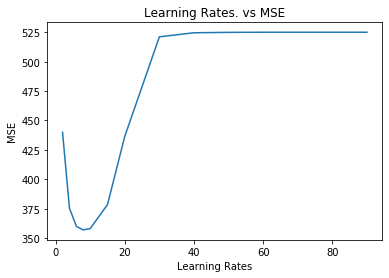

In [83]:
plt.plot(MaxDepths, xgbr_depths)
plt.xlabel('Learning Rates')
plt.ylabel('MSE')
plt.title('Learning Rates. vs MSE')
plt.show()

In [85]:
pd.Series(dict(zip(MaxDepths, xgbr_depths))).sort_values(ascending= False)

90    525.039271
80    525.039271
70    525.039271
60    525.039271
50    524.945158
40    524.596558
30    521.149540
2     439.876807
20    436.573148
15    378.498024
4     375.442939
6     359.956133
10    358.059830
8     356.938937
dtype: float64

In [75]:
learning_rates = [.01, .05, .1, .15, .2, .25]
xgbr_best_rates

In [86]:
for rate in learning_rates:
    xgbr_model2 = XGBRegressor(random_state= 42, n_jobs= -1, max_depth=8, eta= rate)
    xgbr_best_rates.append(score_model(xgbr_model2))

[20:48:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:51:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:56:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:59:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:01:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [91]:
xgbr_best_rates = best_rates[-6:]

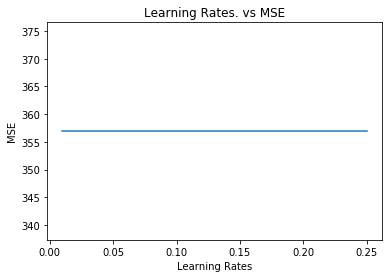

In [92]:
plt.plot(learning_rates, xgbr_best_rates)
plt.xlabel('Learning Rates')
plt.ylabel('MSE')
plt.title('Learning Rates. vs MSE')
plt.show()

In [99]:
lr2 = [.2, .3, .4, .5, .6]
lr2_best_rates = []

In [101]:
for rate in lr2:
    xgbr_model2 = XGBRegressor(random_state= 42, n_jobs= -1, max_depth=8, eta= rate, reg_lambda= 1.5)
    lr2_best_rates.append(score_model(xgbr_model2))

[21:41:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:51:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:54:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


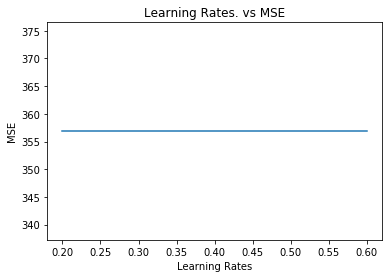

In [102]:
plt.plot(lr2, lr2_best_rates)
plt.xlabel('Learning Rates')
plt.ylabel('MSE')
plt.title('Learning Rates. vs MSE')
plt.show()

In [110]:
estims = [50,100,150,200,250,300]
best_xgbr_estimators = []

In [111]:
for estimator in estims:
    xgbr_model3 = XGBRegressor(random_state= 42, n_jobs= -1, max_depth=8, eta= rate,
                               reg_lambda= 1.5, n_estimators= estimator)
    
    best_xgbr_estimators.append(score_model(xgbr_model3))

[22:26:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:27:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:30:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:42:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:56:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


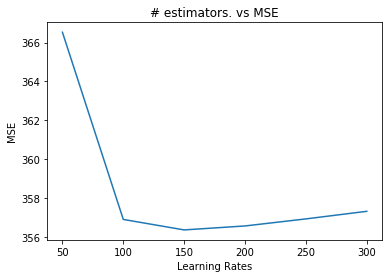

In [112]:
plt.plot(estims, best_xgbr_estimators)
plt.xlabel('Learning Rates')
plt.ylabel('MSE')
plt.title('# estimators. vs MSE')
plt.show()

In [113]:
pd.Series(dict(zip(estims, best_xgbr_estimators))).sort_values(ascending= True)

150    356.347573
200    356.551906
100    356.887765
250    356.915059
300    357.306081
50     366.530774
dtype: float64

## Best Final models to build if introduced to new data

In [ ]:
best_xgbr = XGBRegressor(random_state= 42, n_jobs= -1,
                         max_depth = 8, n_estimators= 150, eta= .3) #eta = LR = .3 by default